# Data Wrangling Project

### Contents:
    1. Data Gathering
    2. Assessing Data
    3. Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import requests as r
import tweepy as twp
import json
import matplotlib.pyplot as plt
%matplotlib inline

### Data Gathering

##### 1. Twitter archive data:

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

##### 2. Image prediction data:

In [3]:
# downloading image predictions data using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)
with open('image_predictions.tsv', 'wb') as outputfile:
    outputfile.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

##### 3. Retweet/Favourite count data:

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
tweets_collection = []
with open('tweet-json.txt') as file:
    all_lines = file.readlines()
    for line in all_lines:
        line_dict = json.loads(line)
        tweets_collection.append(line_dict)

In [6]:
tweets_api_df = pd.DataFrame(tweets_collection)
tweets_api_df.drop(tweets_api_df.columns.difference(['id','retweet_count', 'favorite_count']), 1, inplace=True)
tweets_api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
tweets_api_df.to_csv('tweets_api_df.csv')

###### Conclusion for data gathering
Quick recap what I did so far. I gathered 3 datasets from different resources. First, twitter archive data was given by the Udacity instructor and therefore I simply loaded that CSV file using pandas. And the second dataset is acquired from the link https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using python request library and then loaded to Jupyter notebook using pandas read_csv function. And last data should have been gained by using tweeter's API tweepy. But I could not get access to this API although I requested access for that API. After all, I had no choice but just getting that dataset also from the  Udacity classroom. Then after loading that txt file I read it line by line and converted each line to a dictionary and appended that to the list. After that, I created I data frame from that list and dropped unnecessary columns.

### Assessing Data
##### 1. Tweeter archive data

In [8]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
435,820446719150292993,NaN,NaN,2017-01-15 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Peaches. She's the ulti...,8.001414e+17,4.196984e+09,2016-11-20 00:59:15 +0000,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
1690,681339448655802368,NaN,NaN,2015-12-28 05:02:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Asher. He's not wearing a seatbelt or ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681339448...,9,10,Asher,None,None,None,None
354,831262627380748289,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,None,None,None,None
546,805823200554876929,NaN,NaN,2016-12-05 17:16:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Reginald. He's one magi...,7.841832e+17,4.196984e+09,2016-10-07 00:06:50 +0000,"https://vine.co/v/5ghHLBMMdlV,https://vine.co/...",12,10,Reginald,None,None,None,puppo
797,773191612633579521,NaN,NaN,2016-09-06 16:10:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grey. He's the dogtor in charge of you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773191612...,12,10,Grey,None,None,None,None
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None,None,None,None
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [9]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive_df[twitter_archive_df['rating_numerator'] < 10].shape[0]

440

There 440 records in which rating numerator is less than 10. These rows should be removed.

In [11]:
twitter_archive_df[twitter_archive_df['rating_denominator'] != 10].shape[0]

23

There 23 records where rating denominator is different than 10. 

In [12]:
twitter_archive_df[twitter_archive_df['rating_numerator'] >= 20].shape[0]

25

There are several cases where rating numerator is way bigger than 10.

In [13]:
(twitter_archive_df == 'None').sum()

C:\Users\USMON\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [14]:
twitter_archive_df[twitter_archive_df.name == 'None'].head()['name']

5     None
7     None
12    None
24    None
25    None
Name: name, dtype: object

In [15]:
twitter_archive_df[(twitter_archive_df.name.apply(len)<3) | (twitter_archive_df.name=='the')]['name'].sample(10)

2191      a
553      Bo
801       a
2125      a
2352      a
1004      a
2037    the
1368      a
1878      a
1193      a
Name: name, dtype: object

In [16]:
twitter_archive_df[(twitter_archive_df.name.apply(len)<3) | (twitter_archive_df.name=='the')]['name'].shape[0]

87

In [17]:
twitter_archive_df.retweeted_status_id.notnull().sum()

181

##### Image_prediction dataset

In [18]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,Labrador_retriever,0.048200,True,groenendael,0.015394,True
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
non_dogs = image_predictions.query("p1_dog ==False and p2_dog == False and p3_dog == False")

In [21]:
non_dogs.shape[0]

324

In [22]:
non_dogs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


In [23]:
non_dogs_p1 = image_predictions.query("p1_dog ==False")

In [24]:
non_dogs_p1.shape[0]

543

In [25]:
non_dogs_p1.sort_values('p1_conf', ascending=False).head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,1.002880e-05,True,Eskimo_dog,1.434470e-06,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,1.448950e-05,True,wok,6.060880e-06,False
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,1.763430e-05,False,racket,1.470730e-05,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,2.987300e-05,False,agama,2.150760e-05,False
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,7.657020e-05,True,menu,2.164680e-06,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,7.191480e-05,False,echidna,4.447290e-05,False
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,8.675670e-05,True,racket,5.332190e-05,False
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,1.596210e-04,False,crane,1.799800e-06,False


##### Twitter API dataset (retweet count and favorite count)

In [26]:
tweets_api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
tweets_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessment conclusions
### Archive dataset
###### Data quality issues
1. There are some cases where numerator is incorrect.
2. There are 23 records where rating denominator is different than 10.
3. 181 retweets should be removed since we only interested on origanal tweets
4. 78 reply tweets which should be removed since we interested to have original tweets only
5. There are values of 'None' which should be replaced with NaN (missing value)
6. Drop unnecessary columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp after removing retweets from dataset.
7. Timestamp column is string datatype which should be datetime
8. Rename timestamp columns to more semantically correct name.
9. There cases where name columns holds values of 'a', 'an', 'the' and other very short names.

###### Data tidiness issues
1. Stage columns should be created instead of keeping columns for each stage type
2. Removing duplicated rows after re-structuring new dataset
    
    
### Prediction dataset
###### Data quality issues
1. Entries should be removed where values in p1_dog column has False value since it is the most confident prediction and it is giving the prediction of non-dogness.
2. All other prediction's columns should be dropped since I use only first prediction in analysis and p1_dog columns should be dropped because it provides no usefull information anymore.
3. Remaining column names should be renamed to more meaningful names.

###### Data tidiness issue
1. This dataset should be joined with archive dataset
    
### Twitter API dataset
###### Data tidiness issue
1. The dataset should be combined with archive dataset.
    

## Cleaning Data
### Archive data

In [28]:
clean_archive_df = twitter_archive_df.copy()

###### Define
1. Correct numerator values should be extracted and replaced.
2. Records where rating denominator is different than 10 needs to be dropped
3. Remove retweets
4. Remove tweets which are reply for other tweet
5. Replace values of 'None' with NaN (missing value)
6. Drop unnecessary columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
7. Convert timestamp column to datetime
8. Rename timestamp columns to more semantically correct name.
9. Drop rows where name columns holds values of 'a', 'an', 'the' and other very short names.
    
###### Tidiness issues:
1. Stage columns should be created instead of keeping columns for each stage type
2. Removing duplicated rows after re-structuring new dataset
###### Code

In [29]:
# 1. There are 440 records in which rating numerator is less than 10. These rows should be removed.
# 2. Records where rating denominator is different than 10 needs to be dropped 

# select only rows whose text column contains the following format
clean_archive_df = clean_archive_df[clean_archive_df.text.str.contains("\d+[\.]?\d+\/10", na=False, regex=True)]

# extract numerators and denominators
num_dens = clean_archive_df.text.str.extract(r"(\d+[\.]?\d+\/10)", expand=False)
clean_archive_df["rating_numerator"] = num_dens.apply(lambda x: str(x)[:-3]).astype(float)
clean_archive_df["rating_denominator"] = 10

##### Test

In [30]:
# 1. There are 440 records in which rating numerator is less than 10. These rows should be removed.
print(clean_archive_df.query("rating_numerator < 10").shape[0])
# for simplicity I do know that there is numerator with value 9.75 in original dataset.
# therefore I check its existance in cleaned dataset that way I make sure that all decimal values are also grabbed
print(clean_archive_df[clean_archive_df['rating_numerator']==9.75]['rating_numerator'])

# 2. Records where rating denominator is different than 10 needs to be dropped 
print(clean_archive_df.query("rating_denominator != 10").shape[0])

4
340    9.75
695    9.75
Name: rating_numerator, dtype: float64
0


##### Code

In [31]:
#3. Remove retweets
clean_archive_df = clean_archive_df[clean_archive_df.retweeted_status_id.isnull()]

#### Test

In [32]:
clean_archive_df.retweeted_status_id.notnull().sum()

0

#### Code

In [33]:
# 4. Remove tweets which are reply for other tweet
clean_archive_df = clean_archive_df[clean_archive_df.in_reply_to_status_id.isnull()]

#### Test

In [34]:
clean_archive_df.in_reply_to_status_id.notnull().sum()

0

#### Code 

In [35]:
# 5. Replace values of 'None' with NaN (missing value)
clean_archive_df.replace('None', np.NaN, inplace=True)

#### Test

In [36]:
clean_archive_df[clean_archive_df == 'None'].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

#### Code

In [37]:
# 6. Drop unnecessary columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
clean_archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis='columns', inplace=True)

#### Test

In [38]:
for col in ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']:
     print(f'{col}: {col in clean_archive_df.columns}')

in_reply_to_status_id: False
in_reply_to_user_id: False
retweeted_status_id: False
retweeted_status_user_id: False
retweeted_status_timestamp: False


#### Code

In [39]:
# 7. Convert timestamp column to datetime
clean_archive_df['timestamp'] = pd.to_datetime(clean_archive_df['timestamp']) 

#### Test

In [40]:
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 2350
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1673 non-null   int64              
 1   timestamp           1673 non-null   datetime64[ns, UTC]
 2   source              1673 non-null   object             
 3   text                1673 non-null   object             
 4   expanded_urls       1670 non-null   object             
 5   rating_numerator    1673 non-null   float64            
 6   rating_denominator  1673 non-null   int64              
 7   name                1203 non-null   object             
 8   doggo               79 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              191 non-null    object             
 11  puppo               23 non-null     object             
dtypes: datetime64[ns, UTC](1), float64

#### Code

In [41]:
# 8. Rename timestamp columns to more semantically correct name.
clean_archive_df.rename(columns = {'timestamp':'Date and Time'}, inplace=True)

#### Test

In [42]:
print(f"timestamp exists? {'timestamp' in clean_archive_df.columns}")
print(f"Date and Time exists? {'Date and Time' in clean_archive_df.columns}")

timestamp exists? False
Date and Time exists? True


#### Code

In [43]:
# 9. Drop rows where name columns holds values of 'a', 'an', 'the' and other very short names.
clean_archive_df.name = clean_archive_df.name.astype(str)
clean_archive_df.drop(clean_archive_df[(clean_archive_df.name.apply(len) < 3) | (clean_archive_df.name == 'the')].index, inplace=True)

#### Test

In [44]:
clean_archive_df[(clean_archive_df.name.apply(len) < 3) | (clean_archive_df.name == 'the')].index

Int64Index([], dtype='int64')

#### Code

In [45]:
clean_archive_df.shape

(1624, 12)

In [46]:
# Tidiness issue:  1. Stage columns should be created instead of keeping columns for each stage type
clean_archive_df = pd.melt(clean_archive_df, 
        id_vars = ['tweet_id', 'Date and Time', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
        var_name = 'stage_delete', value_name="stage")
clean_archive_df.drop(columns = ['stage_delete'], inplace=True)

#### Test

In [47]:
clean_archive_df.head()

,tweet_id,Date and Time,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN


##### Code

In [48]:
# 2. Removing duplicated rows after re-structuring new dataset
clean_archive_df.shape

(6496, 9)

In [49]:
clean_archive_df.drop_duplicates(keep='first', inplace=True)
clean_archive_df.shape

(1920, 9)

In [50]:
clean_archive_df[clean_archive_df.tweet_id.duplicated()].shape[0]

296

In [51]:
clean_archive_df.query("tweet_id == 858843525470990336")

,tweet_id,Date and Time,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
142,858843525470990336,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,nan,doggo
1766,858843525470990336,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,nan,NaN


In [52]:
duplicated_tweet_ids = clean_archive_df[clean_archive_df.tweet_id.duplicated()].tweet_id
clean_archive_df.drop(clean_archive_df.query("tweet_id in @duplicated_tweet_ids and stage != stage").index, inplace=True, axis=0)

##### Test

In [53]:
clean_archive_df[clean_archive_df.duplicated()].shape[0]

0

In [54]:
clean_archive_df[clean_archive_df.tweet_id==855851453814013952]

,tweet_id,Date and Time,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
153,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,nan,doggo
5025,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,nan,puppo


In [55]:
clean_archive_df.shape

(1634, 9)

### Prediction dataset
##### Define:
Quality issues:
1. Entries should be removed where values in p1_dog column has False value since it is the most confident prediction and it is giving the prediction of non-dogness.
2. All other prediction's columns should be dropped since I use only first prediction in analysis and p1_dog columns should be dropped because it provides no usefull information anymore.
3. Remaining column names should be renamed to more meaningful names.

Data tidiness issue:
1. This dataset should be joined with archive dataset
##### Code

In [56]:
clean_image_predictions =  image_predictions.copy()

In [57]:
# 1. Entries should be removed where values in p1_dog column has False value since it is the most confident prediction and it is giving the prediction of non-dogness.
clean_image_predictions = clean_image_predictions.query("p1_dog == True")

##### Test

In [58]:
clean_image_predictions.query("p1_dog == False").shape[0]

0

##### Code

In [59]:
# 2. All other prediction's columns should be dropped since I use only first prediction in analysis and p1_dog columns should be dropped because it provides no usefull information anymore.
clean_image_predictions.drop(columns=['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

##### Test

In [60]:
clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [61]:
# 3. Remaining column names should be renamed to more meaningful names.
clean_image_predictions.rename(columns={'p1':'breed', 'p1_conf':'confidance'}, inplace=True)

##### Test

In [62]:
clean_image_predictions.head()

,tweet_id,jpg_url,img_num,breed,confidance
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


##### Code

In [63]:
# Data tidiness issue: 1. This dataset should be joined with archive dataset
clean_archive_df.set_index('tweet_id', inplace=True)

In [64]:
clean_image_predictions.set_index('tweet_id', inplace=True)

In [65]:
clean_archive_df = clean_archive_df.join(clean_image_predictions, how='left')

##### Test

In [66]:
clean_archive_df.head()

,Date and Time,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,confidance
tweet_id,,,,,,,,,,,,
666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10.0,10,nan,NaN,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1.0,Walker_hound,0.260857
666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10,nan,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1.0,English_setter,0.298617
666268910803644416,2015-11-16 14:57:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10.0,10,nan,NaN,NaN,NaN,NaN,NaN
666273097616637952,2015-11-16 15:14:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097...,11.0,10,nan,NaN,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1.0,Italian_greyhound,0.176053
666345417576210432,2015-11-16 20:01:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10.0,10,nan,NaN,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1.0,golden_retriever,0.858744


### Twitter API dataset
##### Define:
    Data tidiness issue
        1. The dataset should be combined with archive dataset.
##### Code

In [67]:
tweets_api_df.rename(columns={'id':"tweet_id"}, inplace=True)

In [68]:
tweets_api_df.set_index('tweet_id', inplace=True)

In [69]:
clean_total_dataset = clean_archive_df.join(tweets_api_df, how='left')

##### Test

In [70]:
clean_total_dataset.head(1)

,Date and Time,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,confidance,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,
666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10.0,10,nan,NaN,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1.0,Walker_hound,0.260857,174,335


In [71]:
clean_total_dataset.to_csv("twitter_archive_master.csv")

## Exploratory Analysis
##### Questions:
1. The most favorite dog breed according to favorite counts?
2. The most retweeted dog breeds(top 3)?
3. How favorite count is related to retweet count?
4. What is the partions of dog stages?
5. What is the average favorite count of each dog stage? 

In [72]:
clean_df = pd.read_csv("twitter_archive_master.csv")

###### 1. The most favorite dog breed according to favorite counts?

In [73]:
favorite_max = clean_df.favorite_count.max()
clean_df[clean_df.favorite_count == favorite_max]['breed']

1310    Lakeland_terrier
Name: breed, dtype: object

###### 2. The most retweeted dog breeds(top 3)?

In [74]:
retweet_count = clean_df.sort_values(by=['retweet_count'], ascending=False)[['retweet_count', 'breed']]
retweet_count[0:3]

,retweet_count,breed
844,79515,Labrador_retriever
1217,56625,Chihuahua
813,52360,Eskimo_dog


###### 3. How favorite count is related to retweet count?

In [75]:
clean_df.corr()['retweet_count']['favorite_count']

0.9057984849077482

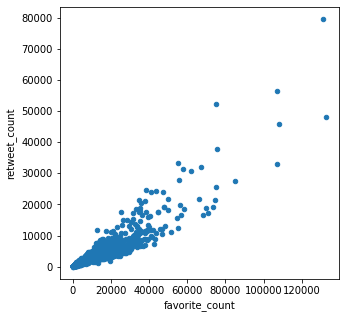

In [76]:
clean_df.plot(kind='scatter', x='favorite_count', y='retweet_count', figsize=(5,5));

###### 4. What is the partions of dog stages?

In [77]:
partions = clean_df.groupby('stage')['tweet_id'].count()/clean_df.shape[0]
partions.sort_values(ascending=False, inplace=True)

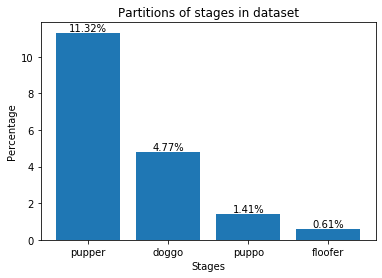

In [78]:
fig, ax = plt.subplots()    
ax.bar(partions.index, partions.values*100)
ax.set_xticklabels(partions.index, minor=False)
plt.title('Partitions of stages in dataset')
plt.xlabel('Stages')
plt.ylabel('Percentage')

locs, labels = plt.xticks()
for i,loc in enumerate(locs):
    plt.text(loc, (partions[i]*100)+0.1, '{:0.2f}%'.format(partions[i]*100), ha = 'center')

###### 5. What is the average favorite count of each dog stage?

In [79]:
average_favorite = clean_df.groupby('stage').favorite_count.mean()
average_favorite.sort_values(ascending=False, inplace=True)

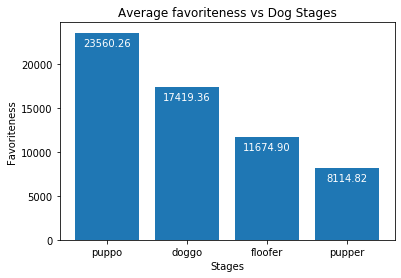

In [80]:
fig, ax = plt.subplots()    
ax.bar(average_favorite.index, average_favorite.values)
ax.set_xticklabels(average_favorite.index, minor=False)
plt.title('Average favoriteness vs Dog Stages')
plt.xlabel('Stages')
plt.ylabel('Favoriteness')

locs, labels = plt.xticks()
for i,loc in enumerate(locs):
    plt.text(loc, average_favorite[i]-1500, '{:0.2f}'.format(average_favorite[i]), ha = 'center', color='w')

## Conclusions

In exploratory analysis I answered 5 following questions and in following paragraph I'll answer them one by one.
1. The most favorite dog breed according to favorite counts?
2. The most retweeted dog breeds(top 3)?
3. How favorite count is related to retweet count?
4. What is the partions of dog stages?
5. What is the average favorite count of each dog stage? 

**Answers:**
1. **Lakeland_terrier** is most the favorite breed
2. **Labrador_retriever**, **Chihuahua**, and **Eskimo_dog** are the breeds which are most retweeted. Specifically Labrador_retriever 79515 times, Chihuahua 56625 times, Eskimo_dog 52360 times retweeted.
3. There is strong positive correlation between favorite count and retweeted count. Correlation cofficient is 0.91
4. Pupper, doggo, puppo and floofer constitutes 11.32, 4.77, 1.41, 0.61 percents, respectively. All other percentage belongs to dogs which doesn't have stage yet.
5.  Pupper, doggo, puppo and floofer have 23560.26, 17419.36, 11674.90 and 8114.82 average favorite counts, respectively.